Test du projet de class trajets indirect

In [182]:
%load_ext autoreload
%autoreload 2
import sys #c'est pas propre mais pour le moment pour importer mes modules perso dans le notebook je ne sais pas faire
sys.path.append(r'C:\Users\martin.schoreisz\git\Outils\Outils\Martin_Perso')
import traitement_od as t
import pandas as pd
import numpy as np
import altair as alt
import datetime as dt
pd.set_option('display.max_colwidth', 1000)
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%time df_journee=t.ouvrir_fichier_lapi('2019-01-29 00:00:00','2019-01-30 23:59:00')

Wall time: 1min 45s


In [7]:
toto=t.trajet_indirect(df_journee,'2019-01-29 00:00:00', 60, 16, [19,4,5])

In [74]:
toto.df_transit.empty

True

In [38]:
liste_trajet=(pd.DataFrame([{'o_d':'A63-A10','trajets':[{'cameras':[19,4,5],'type_trajet':'indirect'},
                                                       {'cameras':[19,1,5],'type_trajet':'indirect'},
                                                       {'cameras':[19,5],'type_trajet':'direct'},
                                                      ]},
                          {'o_d':'A62-A10','trajets':[{'cameras':[10,4,5],'type_trajet':'indirect'},
                                                       {'cameras':[10,1,5],'type_trajet':'indirect'},
                                                       {'cameras':[10,5],'type_trajet':'direct'},
                                                      ]},
                           ]))

In [39]:
liste_trajet

,o_d,trajets
0,A63-A10,"[{'cameras': [19, 4, 5], 'type_trajet': 'indirect'}, {'cameras': [19, 1, 5], 'type_trajet': 'indirect'}, {'cameras': [19, 5], 'type_trajet': 'direct'}]"
1,A62-A10,"[{'cameras': [10, 4, 5], 'type_trajet': 'indirect'}, {'cameras': [10, 1, 5], 'type_trajet': 'indirect'}, {'cameras': [10, 5], 'type_trajet': 'direct'}]"


Pour une o_d, sur une journee

In [ ]:
dates= pd.date_range('2019-01-29', periods=10, freq='H')
%time 
for date in dates : 
    date=date.strftime("%Y-%m-%d %H:%M:%S")
    for index, value in liste_trajet.iterrows() : 
        o_d, carac_trajet=value[0],value[1]
        for dico_carac in carac_trajet :
            cameras=dico_carac['cameras']
            type_t=dico_carac['type_trajet']
            if type_t=='indirect' : 
                trajet=t.trajet_indirect(df_journee,date, 60, 16, cameras)
                df_trajet=trajet.df_transit#en deduire le total
                if df_trajet.empty : 
                    continue
                trajet.exporter_graph(r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\graphs',o_d)
            else :
                df_trajet=t.trajet_direct(df_journee,date, 60, 16, cameras[0],cameras[1]).df_tps_parcours_pl_final#por permettre le suivi et retrouver les camera intermediaires
            #df_trajet['cameras']=str(cameras)#pour suivi possible
            if 'dico_od' in locals() :
                dico_od=pd.concat([dico_od,df_trajet], sort=False)
            else : 
                dico_od=df_trajet
            print(o_d,date, cameras, len(df_trajet))

Wall time: 0 ns
2019-01-29 00:00:00 [19, 5] 0
2019-01-29 00:00:00 [10, 5] 0
2019-01-29 01:00:00 [19, 5] 0
2019-01-29 01:00:00 [10, 5] 0
2019-01-29 02:00:00 [19, 5] 0
2019-01-29 02:00:00 [10, 5] 0
2019-01-29 03:00:00 [19, 5] 0
2019-01-29 03:00:00 [10, 5] 0
2019-01-29 04:00:00 [19, 5] 0
2019-01-29 04:00:00 [10, 5] 0
2019-01-29 05:00:00 [19, 5] 0
2019-01-29 05:00:00 [10, 5] 0
2019-01-29 06:00:00 [19, 5] 0
2019-01-29 06:00:00 [10, 5] 0
2019-01-29 07h-08h


In [173]:
toto=t.trajet_direct(df_journee,'2019-01-29 08:00:00', 60, 16, 19,4)

In [174]:
graph=toto.plot_graphs()[2]

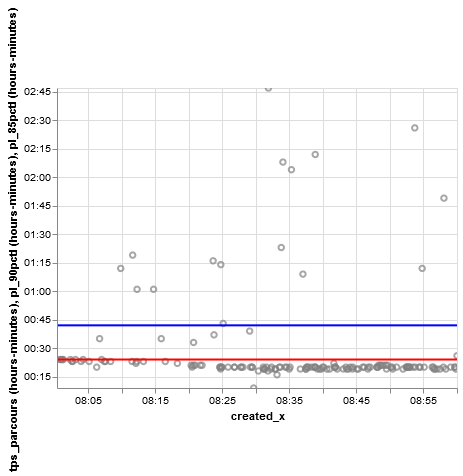

In [175]:
graph